In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

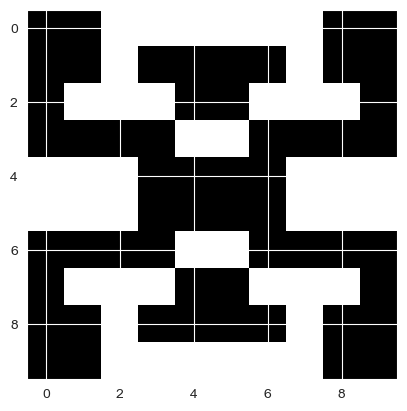

In [21]:
# Define the size of the image
size = 10

# Generate a 5x5 random matrix
quarter = np.random.rand(size//2, size//2)

# Define boolean for shades
shades = False

# Define integer for symmetry type
symmetry = 4  # Change this to 1, 2, or 4 to get different symmetry types

if symmetry == 1:
    # Only y-axis symmetry
    image = np.hstack((quarter, np.flip(quarter, axis=1)))
elif symmetry == 2:
    # x and y-axis symmetry
    half = np.hstack((quarter, np.flip(quarter, axis=1)))
    image = np.vstack((half, np.flip(half, axis=0)))
elif symmetry == 4:
    # x, y and diagonal axis symmetry
    quarter_1 = np.hstack((quarter, np.flip(quarter, axis=1)))
    quarter_2 = np.flip(quarter_1, axis=0)
    image = np.vstack((quarter_1, quarter_2))
    image = 0.5 * (image + np.fliplr(image))

if shades:
    # Normalize to 0-255 for grayscale
    image = (image * 255).astype(np.uint8)
else:
    # Only allow 0 and 255 as valid pixel values
    image = np.where(image > 0.5, 255, 0).astype(np.uint8)

# Display the image
plt.imshow(image, cmap='gray')
plt.show()


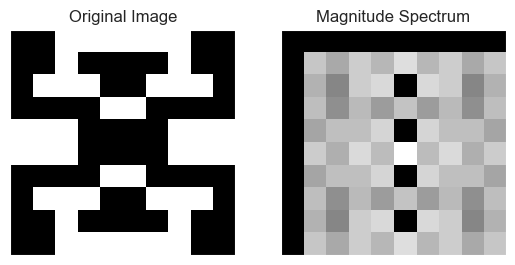

In [22]:
# Convert image to numpy array
image_array = np.array(image)

# Compute Fourier Transform
ft_image = np.fft.fft2(image_array)

# Shift the zero-frequency component to the center of the spectrum
ft_image_shifted = np.fft.fftshift(ft_image)

# Compute magnitude spectrum
magnitude_spectrum = np.abs(ft_image_shifted)

# Display original image and magnitude spectrum
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')  # Adding 1 and taking log to reduce extreme values
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
